In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store_data = pd.read_csv('/Users/catarina/Documents/GitHub/DSR_Mini_Competition/data/rossmann-store-sales/store.csv')
store_data.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
train_data = pd.read_csv('/Users/catarina/Documents/GitHub/DSR_Mini_Competition/data/rossmann-store-sales/new_train.csv', index_col=0)
train_data.head()

/Users/catarina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
pd.Categorical(train_data.StateHoliday)
train_data.SchoolHoliday.astype('category')

numerical = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo']
categorical = ['StateHoliday', 'SchoolHoliday']

In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 9 columns):
Store            864627 non-null int64
DayOfWeek        864627 non-null int64
Date             864627 non-null object
Sales            864627 non-null int64
Customers        864627 non-null int64
Open             864627 non-null int64
Promo            864627 non-null int64
StateHoliday     864627 non-null object
SchoolHoliday    864627 non-null int64
dtypes: int64(7), object(2)
memory usage: 66.0+ MB


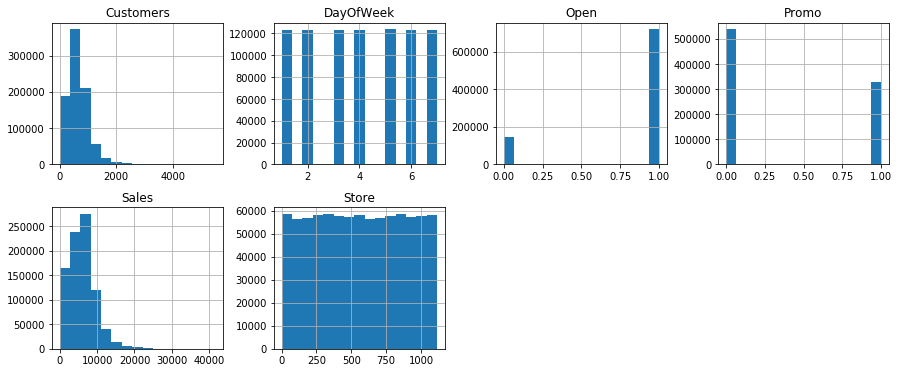

In [7]:
train_data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

plt.show()

In [8]:
train_data["StateHoliday"].value_counts()

0    708388
0    131072
a     16607
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [9]:
train_data["StateHoliday"].replace('0', 0, inplace=True)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
train_data["StateHoliday"].value_counts()

0    839460
a     16607
b      4460
c      4100
Name: StateHoliday, dtype: int64

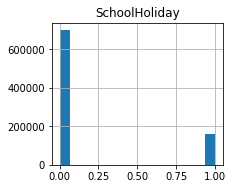

In [11]:
train_data[categorical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

plt.show()

customers vs sales in different days of the week

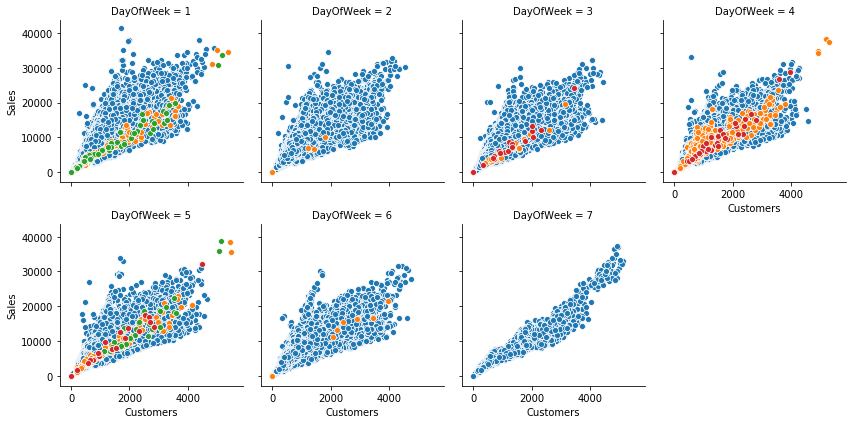

In [12]:
cond_plot = sns.FacetGrid(data=train_data, col='DayOfWeek', hue='StateHoliday', col_wrap=4, legend_out=True)
cond_plot.map(sns.scatterplot, 'Customers', 'Sales')

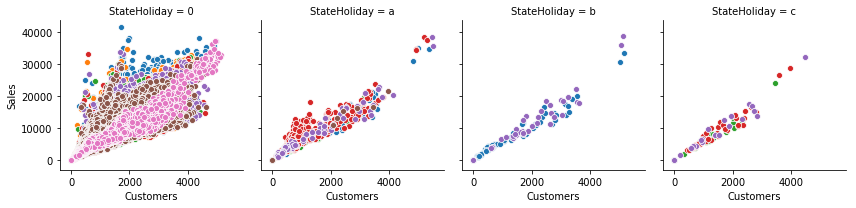

In [13]:
cond_plot = sns.FacetGrid(data=train_data, col='StateHoliday', hue='DayOfWeek', col_wrap=4, legend_out=True)
cond_plot.map(sns.scatterplot, 'Customers', 'Sales')

convert the dates to time date series

In [14]:
train_data['Date'] =  pd.to_datetime(train_data['Date'], format ='%Y-%m-%d')

In [15]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 9 columns):
Store            864627 non-null int64
DayOfWeek        864627 non-null int64
Date             864627 non-null datetime64[ns]
Sales            864627 non-null int64
Customers        864627 non-null int64
Open             864627 non-null int64
Promo            864627 non-null int64
StateHoliday     864627 non-null object
SchoolHoliday    864627 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 66.0+ MB


In [22]:
train_data['Month'] = train_data['Date'].dt.month
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,7
1,2,5,2015-07-31,6064,625,1,1,0,1,7
2,3,5,2015-07-31,8314,821,1,1,0,1,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,7
4,5,5,2015-07-31,4822,559,1,1,0,1,7


In [23]:
train_data['Year'] = train_data['Date'].dt.year
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


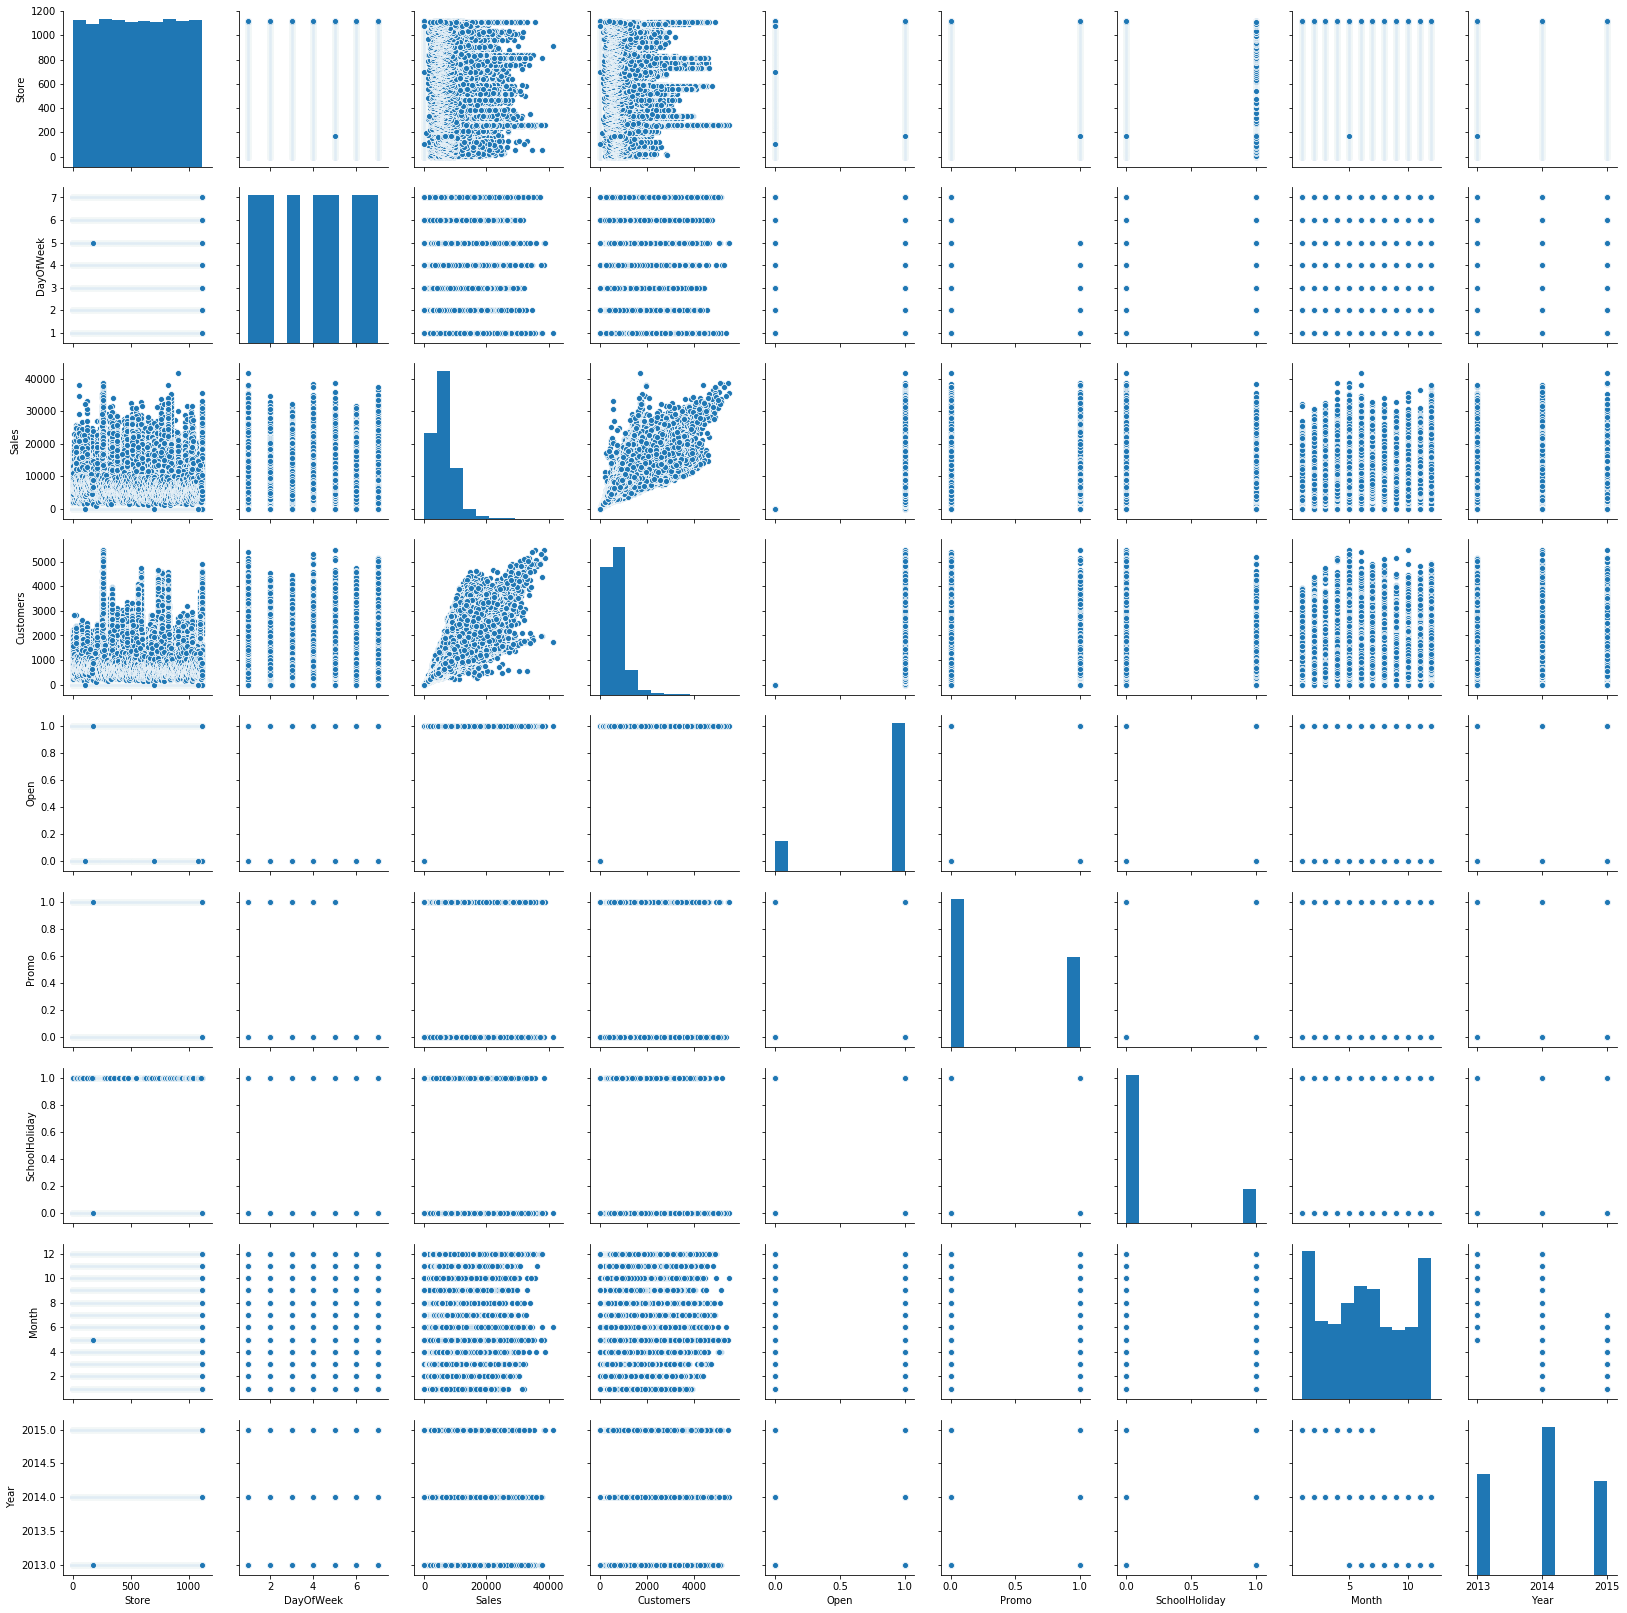

In [26]:
g = sns.pairplot(train_data)


In [28]:
a = train_data.copy()

In [29]:
b = train_data.copy()